# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import nltk
import textwrap   # Wraps the single paragraph in text, and returns a single string containing the wrapped paragraph

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
# !pip install nltk

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\adnan
[nltk_data]     ameen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Read the dataset

In [4]:
%cd /content/drive/MyDrive/Course Material/Topic Modeling

[WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/Course Material/Topic Modeling'
d:\MyDriveData\Teaching\Dr Adnan Amin Slides\NLP-DrAdnan\Topic Modeling


In [5]:
df = pd.read_csv('bbc-text.csv')

In [6]:
df.shape

(2225, 2)

In [7]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


# Since Topic Modeling is unsupervised, therefore we just need features

In [8]:
features = df['text']

# Instantiate Count Vectorizer and fit to the features

In [9]:
vectorizer = CountVectorizer(stop_words = 'english') # since model itself based on wordcount, therefore we are not using TFIDF

In [10]:
X = vectorizer.fit_transform(features)

In [11]:
X # This is document by word Matrix

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 322146 stored elements and shape (2225, 29126)>

# Instantiate LDA

In [12]:
lda_model = LatentDirichletAllocation(n_components=5, random_state = 42) # default: n_components = 10
# Number of components means number of topics. Changing random state will change the results

In [13]:
lda_model.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

## The following code is copied from the scikit learn documention. This function plots the bar plot of each topic. It will show the top 10 words for each topic. This function will give topic by words matrix

In [14]:
def plot_top_words(model, feature_names, n_top_words=10):
  fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
    ax.invert_yaxis()
    ax.tick_params(axis="both", which="major", labelsize=20)
    for i in "top right left".split():
        ax.spines[i].set_visible(False)
    fig.suptitle('LDA', fontsize=40)

  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
  plt.show()

# Get the total words OR Vocab of the dataset

In [15]:
feature_names = vectorizer.get_feature_names_out()

In [16]:
len(feature_names)

29126

# Apply the function

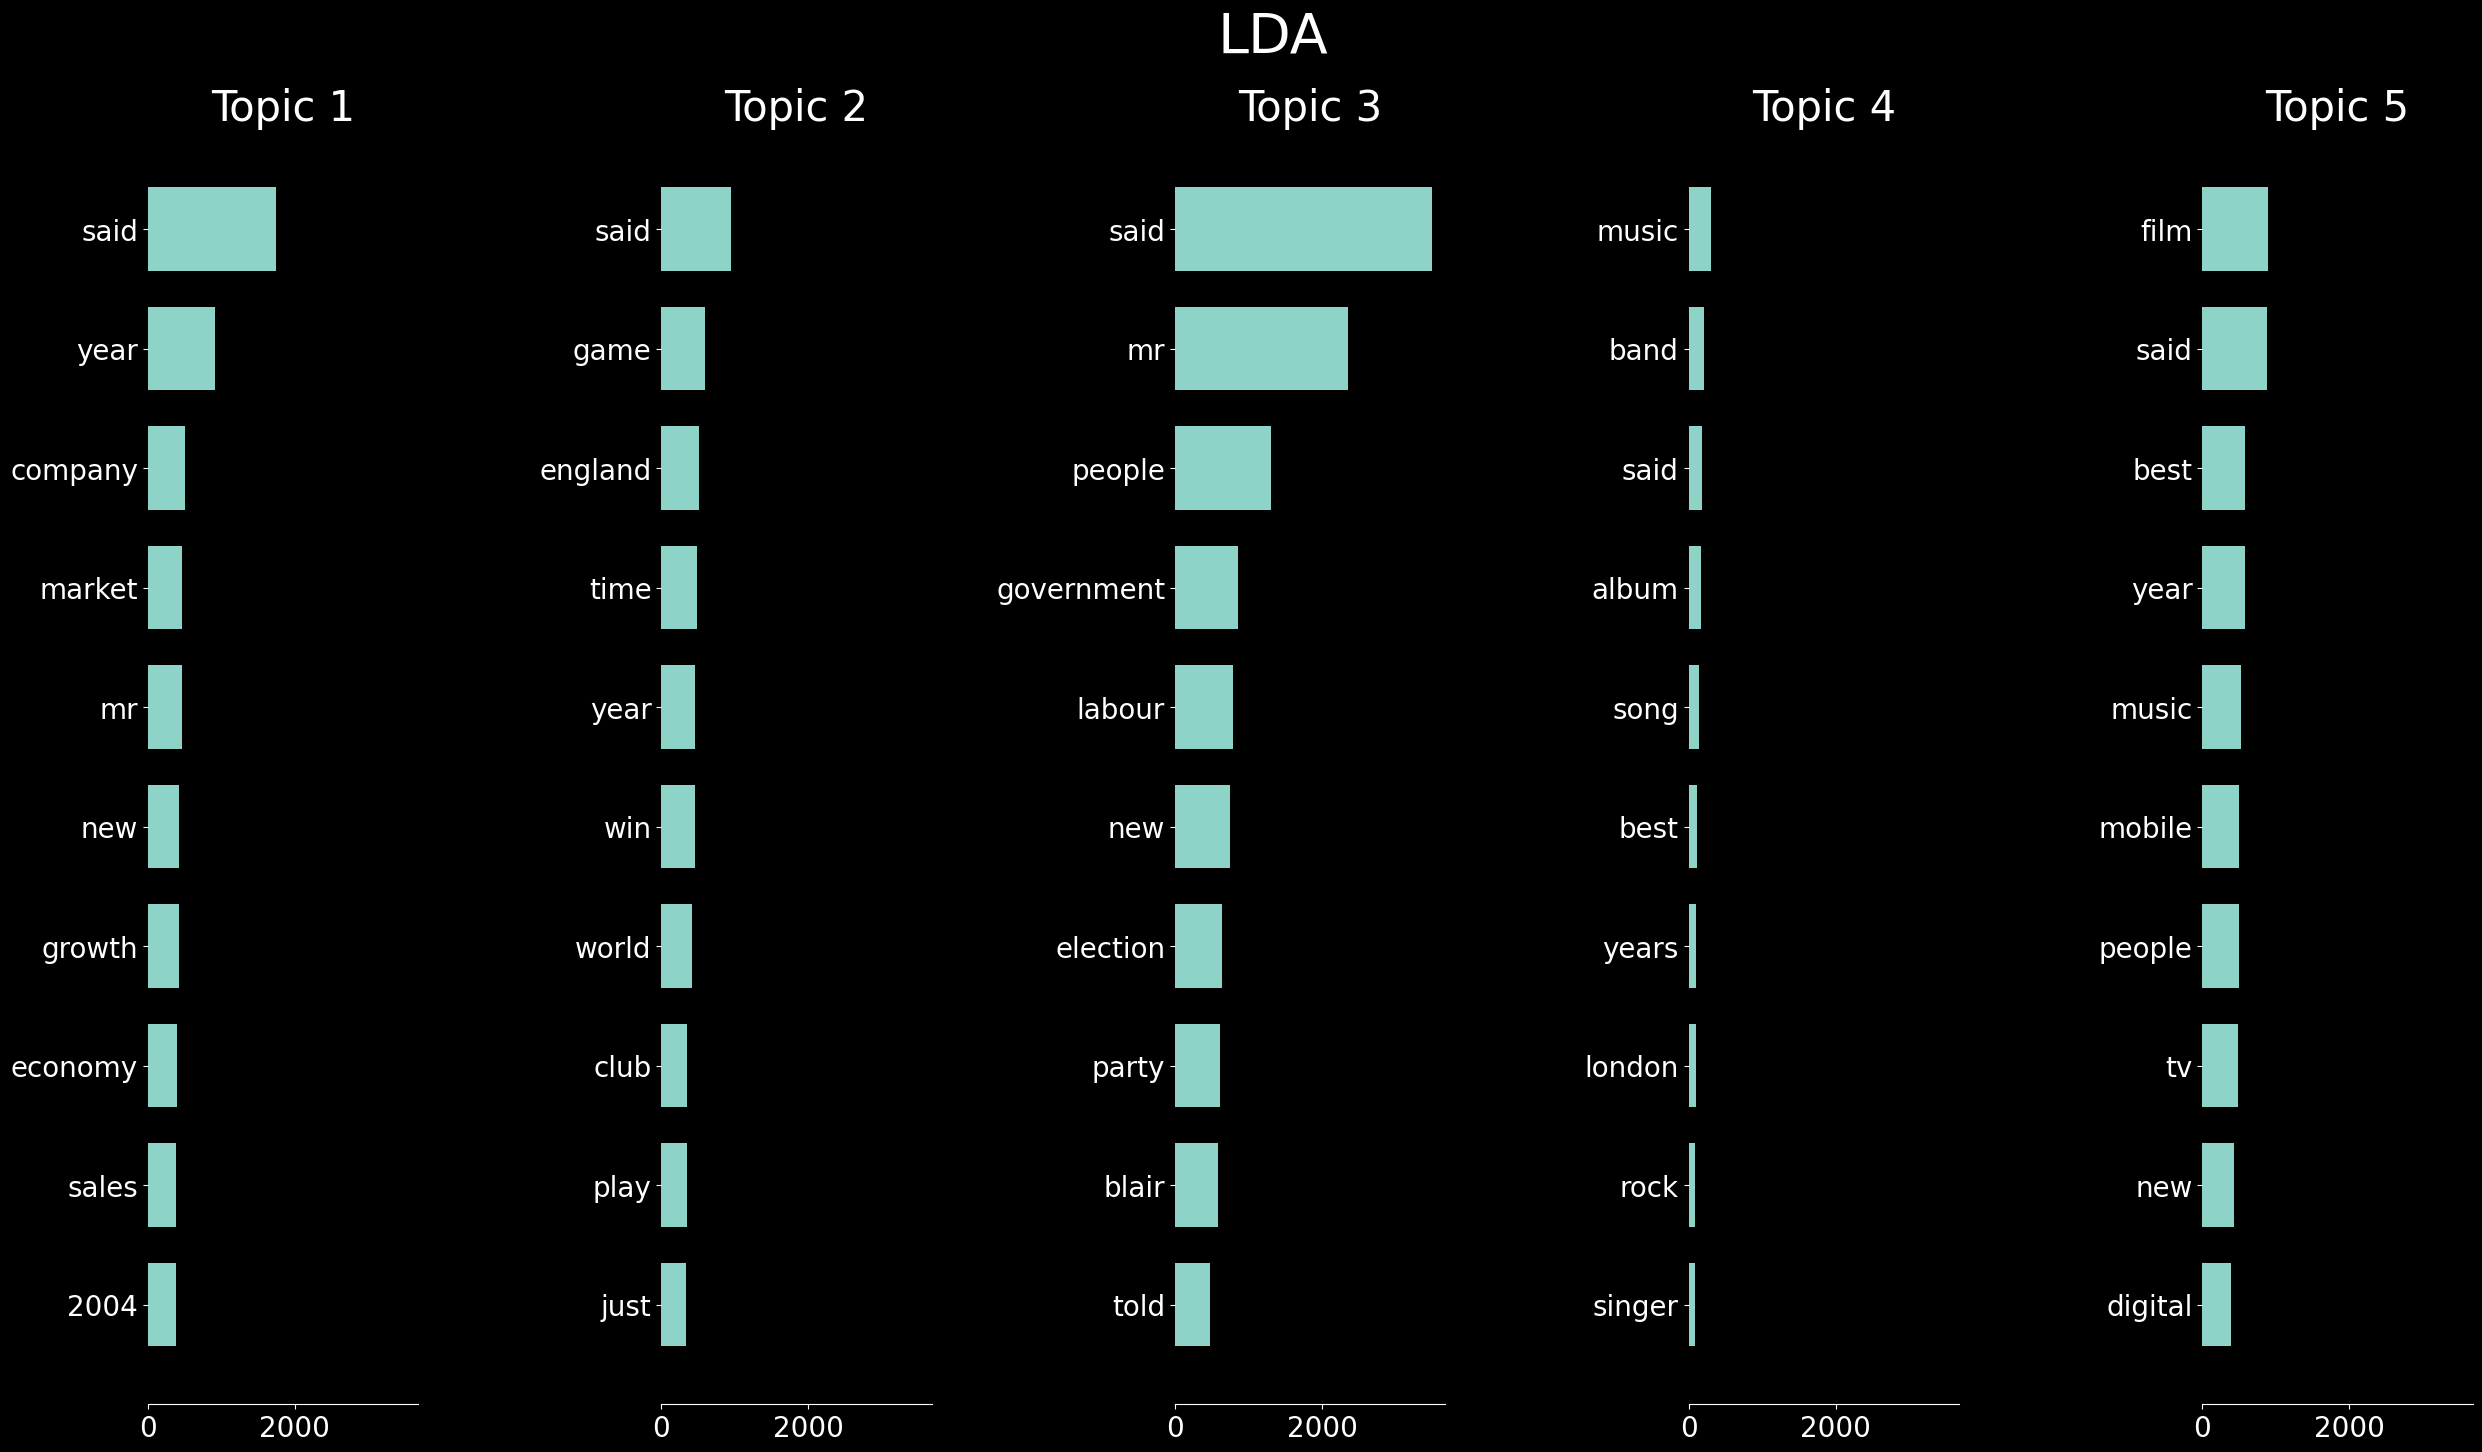

In [17]:
plot_top_words(lda_model, feature_names);

In [18]:
# We have seen the topics which is the property of the model.
# Now we want to see our documents and want to know how they relate to our topic.
# We have seen topics by word matrix.

# Now we want to see documents by topics matrix.

In [19]:
Z = lda_model.transform(X) # Z is the hidden variable which shows distribution over topics.

In [20]:
Z.shape # document by topic matrix

(2225, 5)

# Select a random document and see if the topic are associated with it.

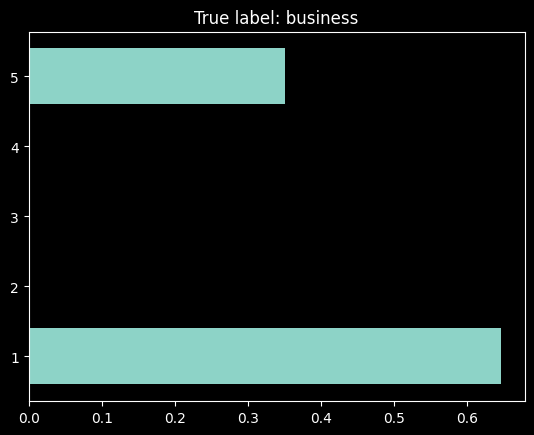

In [21]:
i = np.random.choice(len(df)) # select randon row from the data frame
z = Z[i]# To get the ith row from Z. we get 1D array which represents the distribution over topic
topics = np.arange(5) + 1 # Define the list of topics which are integers from 1 to 5.

# To draw a bar chart plotting the topic distribution along with the topics themselves as well as the true labels

fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title('True label: %s' % df.iloc[i]['category']);

In [22]:
def wrap(x):
  return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)

print(wrap(df.iloc[i]['text']))

disney settles disclosure charges walt disney has settled charges from
us federal regulators that it failed to disclose how family members of
directors were employed by the company.  the media giant was not fined
by the securities and exchange commission  but has agreed to refrain
from any future violations of securities law.  disney failed to tell
investors that between 1999 and 2001 it employed three adult children
of three then directors.  the firm has neither admitted nor denied
wrongdoing in the settlement.  the three disney directors in question
in the central matter of the sec s investigation - reveta bowers
stanley gold and raymond watson - have all since left the company
with ms bowers and mr watson both retiring  and mr gold quitting in
2003. their children were paid between $60 000 (£30 800) and $150 000
a year  with shareholders not being informed.  the sec also found that
disney did not disclose that a 50% disney-owned subsidiary company -
lifetime - employed the wife of c